Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)

2021/11/04

<img align="left" width="50%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" >

### Read the Portal of Experimental Ocean Acidification Data
https://dataportals.pangaea.de/oa-icc/index2.php?

#### DATA SEARCH

https://wiki.pangaea.de/wiki/Main_Page

The harvested data centers are available through a large, all-containing, public, read-only Elasticsearch node; available at: http://ws.pangaea.de/es/portals/pansimple/_search?pretty

In [1]:
import json
import urllib
import pandas as pd

In [2]:
# Extract all articles (citation_date and keyword included)

url = 'http://ws.pangaea.de/es/dataportal-oa-icc/pansimple/_search?size=2000&_source_include=citation_date,keyword'

jsonurl = urllib.request.urlopen(url)
jsonread = json.loads(jsonurl.read())
jsonurl.close()

In [3]:
# Transform the resulting json to a pandas dataframe

df = pd.DataFrame.from_dict(jsonread['hits']['hits'])
df

,_index,_type,_id,_score,_source
0,portals_v2,pansimple,PANGAEA.884674,1.0,"{'citation_date': '2018-01-09', 'keyword': ['A..."
1,portals_v2,pansimple,PANGAEA.779703,1.0,"{'citation_date': '2011-04-21', 'keyword': ['B..."
2,portals_v2,pansimple,PANGAEA.891075,1.0,"{'citation_date': '2018-06-15', 'keyword': ['A..."
3,portals_v2,pansimple,PANGAEA.885874,1.0,"{'citation_date': '2018-02-02', 'keyword': ['B..."
4,portals_v2,pansimple,PANGAEA.872024,1.0,"{'citation_date': '2016-02-14', 'keyword': ['A..."
...,...,...,...,...,...
1267,portals_v2,pansimple,PANGAEA.779699,1.0,"{'citation_date': '2003-04-21', 'keyword': ['A..."
1268,portals_v2,pansimple,PANGAEA.743388,1.0,"{'citation_date': '2006-07-26', 'keyword': ['B..."
1269,portals_v2,pansimple,PANGAEA.819628,1.0,"{'citation_date': '2007-09-23', 'keyword': ['B..."
1270,portals_v2,pansimple,PANGAEA.763909,1.0,"{'citation_date': '2011-08-16', 'keyword': ['A..."


In [4]:
# Reorganize _source dictionnary as columns

# Sometimes only {} and not {'keyword: [...]'}
df['citation_date'] = df['_source'].apply(
    lambda x: eval(str(x))['citation_date'] if 'citation_date' in eval(str(x)).keys() else None)
df['keyword'] = df['_source'].apply(
    lambda x: eval(str(x))['keyword'] if 'keyword' in eval(str(x)).keys() else None)

In [5]:
# Drop unused columns

df.drop(['_score','_type','_index','_source'], axis=1, inplace=True)
df.sort_values(by=['citation_date'])

,_id,citation_date,keyword
328,PANGAEA.755149,1967-12-13,"[Calcification/Dissolution, Coast and continen..."
575,PANGAEA.717620,1992-06-05,"[Benthos, Calcification/Dissolution, Coast and..."
573,PANGAEA.717621,1994-06-05,"[Benthos, Calcification/Dissolution, Coast and..."
977,PANGAEA.721926,1995-03-01,"[Benthos, Calcification/Dissolution, Coast and..."
18,PANGAEA.716842,1995-05-30,"[Benthos, Calcification/Dissolution, Coast and..."
...,...,...,...
633,PANGAEA.936683,2021-10-05,"[Animalia, Antarctic, Benthic animals, Benthos..."
1219,PANGAEA.937216,2021-10-12,"[Benthos, Calcification/Dissolution, Coast and..."
1200,PANGAEA.937391,2021-10-15,"[Animalia, Benthic animals, Benthos, Bottles o..."
1224,PANGAEA.937477,2021-10-20,"[Animalia, Benthic animals, Benthos, Calcifica..."


In [6]:
# Extract all keywords

allKeywordsDB = sorted(df['keyword'].apply(pd.Series).stack().unique())
print(len(allKeywordsDB))
allKeywordsDB

1131


['Abatus cavernosus',
 'Abra alba',
 'Abra nitida',
 'Abra prismatica',
 'Abra tenuis',
 'Acanthaster planci',
 'Acanthochromis polyacanthus',
 'Acanthopagrus schlegelii',
 'Acanthophora spicifera',
 'Acartia bifilosa',
 'Acartia clausi',
 'Acartia grani',
 'Acartia hudsonica',
 'Acartia sp.',
 'Acartia tonsa',
 'Acetabularia acetabulum',
 'Acid-base regulation',
 'Acinetospora crinita',
 'Acipenser baerii',
 'Acropora cerealis',
 'Acropora cervicornis',
 'Acropora digitifera',
 'Acropora eurystoma',
 'Acropora formosa',
 'Acropora horrida',
 'Acropora hyacinthus',
 'Acropora intermedia',
 'Acropora millepora',
 'Acropora muricata',
 'Acropora palmata',
 'Acropora pulchra',
 'Acropora sp.',
 'Acropora spicifera',
 'Acropora tenuis',
 'Acropora verweyi',
 'Acropora yongei',
 'Acrosorium ciliolatum',
 'Acteon tornatilis',
 'Adamussium colbecki',
 'Adelosina longirostra',
 'Affinetrina gualtieriana',
 'Agardhiella subulata',
 'Agaricia agaricites',
 'Aglaothamnion byssoides',
 'Aiptasia p

In [7]:
# Example of a selection on a date range

s = df[df['citation_date'].between('2016-01-01', '2016-02-31')]
print(len(s))
s.sort_values(by=['citation_date'])

12


,_id,citation_date,keyword
114,PANGAEA.870407,2016-01-04,"[Animalia, Antarctic, Arthropoda, Behaviour, B..."
783,PANGAEA.870468,2016-01-09,"[Animalia, Arctic, Behaviour, Boreogadus saida..."
498,PANGAEA.870707,2016-01-12,"[Benthos, Biomass/Abundance/Elemental composit..."
931,PANGAEA.870757,2016-01-13,"[Animalia, Benthic animals, Benthos, Brackish ..."
135,PANGAEA.870756,2016-01-29,"[Arctic, Benthos, Bottles or small containers/..."
542,PANGAEA.871938,2016-02-10,"[Acid-base regulation, Animalia, Arthropoda, B..."
4,PANGAEA.872024,2016-02-14,"[Animalia, Bottles or small containers/Aquaria..."
65,PANGAEA.872313,2016-02-17,"[Animalia, Benthic animals, Benthos, Brackish ..."
630,PANGAEA.872397,2016-02-20,"[Animalia, Atherina presbyter, Behaviour, Chor..."
591,PANGAEA.872533,2016-02-22,"[Baltic Sea, Benthos, Biomass/Abundance/Elemen..."


In [8]:
# Read the CSV file that defines category/keyword relation

df1 = pd.read_csv('OA-ICC_keywords_current.csv')
df1

,Category,Keywords
0,Geographical location,Antarctic
1,Geographical location,Arctic
2,Geographical location,Baltic Sea
3,Geographical location,Black Sea
4,Geographical location,Indian Ocean
...,...,...
1143,Type of community,Rocky-shore community
1144,Type of community,Soft-bottom community
1145,Type of study,Field experiment
1146,Type of study,Field observation


In [9]:
# Aggregate keywords by category

dfCategory = df1.groupby('Category').aggregate(lambda x: sorted(set(x)))
dfCategory

,Keywords
Category,
Geographical location,"[Antarctic, Arctic, Baltic Sea, Black Sea, Ind..."
Incubation type,"[Bottles or small containers/Aquaria (<20 L), ..."
Latitudinal location,"[Polar, Temperate, Tropical]"
Living compartment,"[Benthos, Pelagos]"
Marine habitat,"[Brackish waters, Coast and continental shelf,..."
Multiple stressors,"[Inorganic toxins, Light, Macro-nutrients, Mic..."
OA Natural analog,"[CO2 vent, Estuary, Upwelling]"
Studied parameter or process,"[Acid-base regulation, Behaviour, Biomass/Abun..."
Study focus,"[Entire community, Single species, Species int..."


In [10]:
# Define a python dictionnary for each category

dictCategory = dfCategory.to_dict(orient='dict')['Keywords']
dictCategory

{'Geographical location': ['Antarctic',
  'Arctic',
  'Baltic Sea',
  'Black Sea',
  'Indian Ocean',
  'Mediterranean Sea',
  'North Atlantic',
  'North Pacific',
  'Not applicable',
  'Red Sea',
  'South Atlantic',
  'South Pacific'],
 'Incubation type': ['Bottles or small containers/Aquaria (<20 L)',
  'Containers and aquaria (20-1000 L or < 1 m**2)',
  'Mesocosm or benthocosm'],
 'Latitudinal location': ['Polar', 'Temperate', 'Tropical'],
 'Living compartment': ['Benthos', 'Pelagos'],
 'Marine habitat': ['Brackish waters',
  'Coast and continental shelf',
  'Deep-sea',
  'Laboratory strains',
  'Open ocean'],
 'Multiple stressors': ['Inorganic toxins',
  'Light',
  'Macro-nutrients',
  'Micro-nutrients',
  'Organic toxins',
  'Other',
  'Oxygen',
  'Salinity',
  'Temperature'],
 'OA Natural analog': ['CO2 vent', 'Estuary', 'Upwelling'],
 'Studied parameter or process': ['Acid-base regulation',
  'Behaviour',
  'Biomass/Abundance/Elemental composition',
  'Calcification/Dissolution',

In [11]:
# Extract all keywords from the OA-ICC_keywords_current.csv

allKeywords = dfCategory['Keywords'].apply(pd.Series).stack().unique()
print(len(allKeywords))
allKeywords

1148


array(['Antarctic', 'Arctic', 'Baltic Sea', ..., 'Field experiment',
       'Field observation', 'Laboratory experiment'], dtype=object)

In [12]:
# Numbers of effective keywords used from the different category keywords

for category in sorted(dictCategory.keys()):
    searchedKeywords = dfCategory[dfCategory.index == category]['Keywords'][0]
    df[category] = df['keyword'].apply(lambda x: list(set(x) & set(searchedKeywords)) if x != None else [])
    z = df[category].apply(pd.Series).stack()
    print("=================================================================")
    print("%04d/%04d %s" % (len(z.unique()), len(searchedKeywords), category))
    print(z.unique())
    diff = set(searchedKeywords) - set(z)
    if len(diff) != 0:
        print('\n-----> Never used:', list(diff)[0:10])
    print()

0011/0012 Geographical location
['North Atlantic' 'North Pacific' 'South Pacific' 'Not applicable'
 'Mediterranean Sea' 'Baltic Sea' 'Arctic' 'Antarctic' 'Red Sea'
 'Indian Ocean' 'South Atlantic']

-----> Never used: ['Black Sea']

0003/0003 Incubation type
['Bottles or small containers/Aquaria (<20 L)' 'Mesocosm or benthocosm'
 'Containers and aquaria (20-1000 L or < 1 m**2)']

0003/0003 Latitudinal location
['Temperate' 'Tropical' 'Polar']

0002/0002 Living compartment
['Pelagos' 'Benthos']

0005/0005 Marine habitat
['Coast and continental shelf' 'Laboratory strains' 'Brackish waters'
 'Open ocean' 'Deep-sea']

0009/0009 Multiple stressors
['Temperature' 'Other' 'Oxygen' 'Light' 'Macro-nutrients' 'Salinity'
 'Micro-nutrients' 'Inorganic toxins' 'Organic toxins']

0003/0003 OA Natural analog
['CO2 vent' 'Estuary' 'Upwelling']

0015/0015 Studied parameter or process
['Other studied parameter or process' 'Behaviour'
 'Primary production/Photosynthesis' 'Calcification/Dissolution'
 'Bio

In [13]:
# Example of keywords category 

print(dictCategory['Geographical location'])

['Antarctic', 'Arctic', 'Baltic Sea', 'Black Sea', 'Indian Ocean', 'Mediterranean Sea', 'North Atlantic', 'North Pacific', 'Not applicable', 'Red Sea', 'South Atlantic', 'South Pacific']


In [14]:
# Find different keywords or all keywords, combined with date ranges (before 2015 and after)

#selection = ['North Pacific', 'South Pacific']
#selection = ['Mediterranean Sea']
selection = dictCategory['Geographical location']    # all keywords

s_total = df[df['Geographical location'].apply(lambda x: bool(set(x) & set(selection)))]
s_period1 = s_total[s_total['citation_date'].between('1950-01-01', '2014-12-31')]
s_period2 = s_total[s_total['citation_date'].between('2015-01-01', '2030-12-31')]

print('Total: ', len(s_total))
print('< 2015', len(s_period1))
print('>=  2015', len(s_period2))

s_period2.sort_values(by=['citation_date'])

Total:  1245
< 2015 547
>=  2015 698


,_id,citation_date,keyword,Geographical location,Incubation type,Latitudinal location,Living compartment,Marine habitat,Multiple stressors,OA Natural analog,Studied parameter or process,Study focus,Targeted group,Targeted kingdom,Targeted phylum,Targeted species,Type of community,Type of study
305,PANGAEA.849401,2015-01-29,"[Alaria esculenta, Arctic, Benthos, Biomass/Ab...",[Arctic],[Bottles or small containers/Aquaria (<20 L)],[Polar],[Benthos],[Coast and continental shelf],[],[],"[Primary production/Photosynthesis, Respiratio...",[Single species],[Macroalgae],[Chromista],[Ochrophyta],"[Alaria esculenta, Desmarestia aculeata]",[],[Laboratory experiment]
1247,PANGAEA.872310,2015-02-17,"[Benthos, Calcification/Dissolution, Coast and...",[North Atlantic],[Mesocosm or benthocosm],[Temperate],[Benthos],[Coast and continental shelf],[],[],[Calcification/Dissolution],[Entire community],[],[],[],[],[Rocky-shore community],[Field experiment]
687,PANGAEA.872395,2015-02-20,"[Animalia, Behaviour, Benthic animals, Benthos...",[North Pacific],[Containers and aquaria (20-1000 L or < 1 m**2)],[Temperate],[Benthos],[Brackish waters],[Oxygen],[],"[Behaviour, Growth/Morphology]",[Single species],[Benthic animals],[Animalia],[Mollusca],[Mytilus coruscus],[],[Laboratory experiment]
606,PANGAEA.843600,2015-03-05,"[Bottles or small containers/Aquaria (<20 L), ...",[Not applicable],[Bottles or small containers/Aquaria (<20 L)],[],[Pelagos],[Laboratory strains],[Light],[],"[Primary production/Photosynthesis, Calcificat...",[Single species],[Phytoplankton],[Chromista],[Haptophyta],[Emiliania huxleyi],[],[Laboratory experiment]
1000,PANGAEA.859062,2015-03-22,"[Benthos, Biomass/Abundance/Elemental composit...",[South Pacific],[Bottles or small containers/Aquaria (<20 L)],[Tropical],[Benthos],[Coast and continental shelf],[],[],"[Primary production/Photosynthesis, Respiratio...",[Single species],[Seagrass],[Plantae],"[Tracheophyta, Charophyta]","[Thalassia hemprichii, Halodule uninervis, Cym...",[],[Laboratory experiment]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,PANGAEA.936683,2021-10-05,"[Animalia, Antarctic, Benthic animals, Benthos...",[Antarctic],[Containers and aquaria (20-1000 L or < 1 m**2)],[Polar],[Benthos],[Coast and continental shelf],[],[],"[Gene expression (incl. proteomics), Other met...",[Single species],[Benthic animals],[Animalia],[Cnidaria],[Malacobelemnon daytoni],[],[Laboratory experiment]
1219,PANGAEA.937216,2021-10-12,"[Benthos, Calcification/Dissolution, Coast and...",[South Atlantic],[Containers and aquaria (20-1000 L or < 1 m**2)],[Temperate],[Benthos],[Coast and continental shelf],[],[],"[Primary production/Photosynthesis, Calcificat...",[Single species],[Macroalgae],[Plantae],[Rhodophyta],"[Lithothamnion crispatum, Melyvonnea erubescen...",[],[Laboratory experiment]
1200,PANGAEA.937391,2021-10-15,"[Animalia, Benthic animals, Benthos, Bottles o...",[North Pacific],[Bottles or small containers/Aquaria (<20 L)],[Temperate],[Benthos],[Coast and continental shelf],[],[],[Gene expression (incl. proteomics)],[Single species],[Benthic animals],[Animalia],[Mollusca],[Crassostrea gigas],[],[Laboratory experiment]
1224,PANGAEA.937477,2021-10-20,"[Animalia, Benthic animals, Benthos, Calcifica...",[North Atlantic],[Containers and aquaria (20-1000 L or < 1 m**2)],[Temperate],[Benthos],[Coast and continental shelf],[],[],"[Calcification/Dissolution, Growth/Morphology,...",[Single species],[Benthic animals],[Animalia],[Mollusca],[Chamelea gallina],[],[Laboratory experiment]


In [15]:
# Example of an inversing boolean mask (here all articles that does not have a living compartment keyword)

selection = ['Pelagos','Benthos']
s = df[~df['Living compartment'].apply(lambda x: bool(set(x) & set(selection)))]
print(len(s))
s.sort_values(by=['citation_date'])

19


,_id,citation_date,keyword,Geographical location,Incubation type,Latitudinal location,Living compartment,Marine habitat,Multiple stressors,OA Natural analog,Studied parameter or process,Study focus,Targeted group,Targeted kingdom,Targeted phylum,Targeted species,Type of community,Type of study
562,PANGAEA.756663,2010-08-19,"[Animalia, Benthic animals, Bottles or small c...",[North Atlantic],[Bottles or small containers/Aquaria (<20 L)],[Temperate],[],[Coast and continental shelf],[],[],"[Respiration, Other metabolic rates, Growth/Mo...",[Single species],[Benthic animals],[Animalia],[Mollusca],[Mytilus edulis],[],[Laboratory experiment]
537,PANGAEA.774587,2011-01-23,Strongylocentrotus purpuratus,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
896,PANGAEA.767576,2011-08-31,"[Antarctic, Emiliania huxleyi, Indian Ocean, N...","[South Pacific, Indian Ocean, Antarctic, North...",[],[],[],[],[],[],[],[],[Phytoplankton],[],[],[Emiliania huxleyi],[],[]
176,PANGAEA.826461,2012-01-21,"[Laboratory experiment, Laboratory strains, Li...",[North Pacific],[],[],[],[Laboratory strains],[Light],[],[Respiration],[],[Phytoplankton],[],[Ochrophyta],[Thalassiosira pseudonana],[],[Laboratory experiment]
34,PANGAEA.823110,2012-11-21,"[Bottles or small containers/Aquaria (<20 L), ...",[North Pacific],[Bottles or small containers/Aquaria (<20 L)],[],[],[Laboratory strains],[Macro-nutrients],[],"[Primary production/Photosynthesis, Respiratio...",[Single species],[Phytoplankton],[Chromista],[Ochrophyta],[Phaeodactylum tricornutum],[],[Laboratory experiment]
579,PANGAEA.829084,2013-02-10,"[Nodularia spumigena, Not applicable]",[Not applicable],[],[],[],[],[],[],[],[],[],[],[],[Nodularia spumigena],[],[]
269,PANGAEA.830817,2013-03-21,"[Calcification/Dissolution, Laboratory experim...",[Not applicable],[],[],[],[Laboratory strains],[Micro-nutrients],[],[Calcification/Dissolution],[],[],[],[],[Stylophora pistillata],[],[Laboratory experiment]
1120,PANGAEA.869831,2015-12-26,Zostera marina,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
8,PANGAEA.869832,2015-12-26,Zostera marina,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
640,PANGAEA.869834,2015-12-27,Zostera marina,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]


In [16]:
dhisto = pd.DataFrame()

year = 2015
list1 = ['Targeted phylum', 'Study focus', 'Studied parameter or process', 'Multiple stressors']

for l in list1:
    selection = dictCategory[l]
    s_total = df[df[l].apply(lambda x: bool(set(x) & set(selection)))]
    s_period1 = s_total[s_total['citation_date'].between('1950-01-01', str(year-1)+'-12-31')]
    s_period2 = s_total[s_total['citation_date'].between(str(year)+'-01-01', '2030-12-31')]
    
    dhisto = dhisto.append({'name': l, 
                            'before ' + str(year): 100 * len(s_period1)/len(s_total), 
                            'after ' + str(year):  100 * len(s_period2)/len(s_total)}, 
                           ignore_index=True)

dhisto.set_index('name', inplace=True)
dhisto

,before 2015,after 2015
name,,
Targeted phylum,43.961353,56.038647
Study focus,43.457573,56.542427
Studied parameter or process,43.690096,56.309904
Multiple stressors,35.758836,64.241164


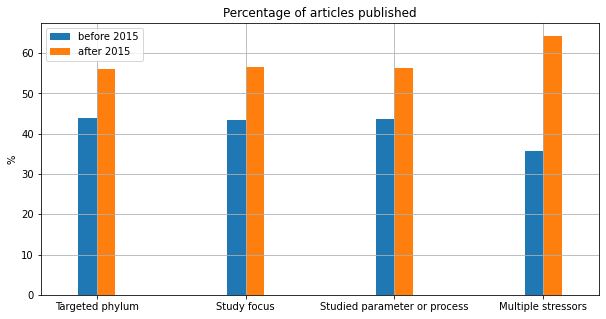

In [17]:
p = dhisto.plot.bar(title="Percentage of articles published", 
                xlabel="", ylabel="%",
                rot=0, grid=True, figsize=[10,5], width=0.25)

In [18]:
#df[df['Geographical location'].apply(lambda x: bool(set(x) & set(["North Pacific"])))]
#df[df['Geographical location'].apply(lambda x: bool(set(x) & set(["Not applicable"])))]
a = df[df['Geographical location'].apply(lambda x: len(set(x)) == 0)]
a

,_id,citation_date,keyword,Geographical location,Incubation type,Latitudinal location,Living compartment,Marine habitat,Multiple stressors,OA Natural analog,Studied parameter or process,Study focus,Targeted group,Targeted kingdom,Targeted phylum,Targeted species,Type of community,Type of study
7,PANGAEA.869837,2015-12-28,Zostera marina,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
8,PANGAEA.869832,2015-12-26,Zostera marina,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
281,PANGAEA.779698,2003-04-21,"[Animalia, Benthic animals, Benthos, Calcifica...",[],[Containers and aquaria (20-1000 L or < 1 m**2)],[],[Benthos],[Laboratory strains],[Temperature],[],[Calcification/Dissolution],[Single species],[Benthic animals],[Animalia],[Cnidaria],[Stylophora pistillata],[],[Laboratory experiment]
316,PANGAEA.777720,2011-03-15,"[Animalia, Balanophyllia europaea, Benthic ani...",[],[],[Temperate],[Benthos],[Coast and continental shelf],[Temperature],[CO2 vent],[Calcification/Dissolution],[Single species],[Benthic animals],[Animalia],[Cnidaria],[Balanophyllia europaea],[],[Field experiment]
479,PANGAEA.779701,2011-04-21,"[Benthos, Bottles or small containers/Aquaria ...",[],[Bottles or small containers/Aquaria (<20 L)],[Temperate],[Benthos],[Coast and continental shelf],[],[],[],[Single species],[Macroalgae],[Plantae],[Chlorophyta],"[Halimeda taenicola, Halimeda opuntia]",[],[Laboratory experiment]
485,PANGAEA.868592,2016-11-18,"[Behaviour, Benthos, CO2 vent, Coast and conti...",[],[],[Temperate],"[Pelagos, Benthos]",[Coast and continental shelf],[],[CO2 vent],[Behaviour],[Entire community],[],[],[],[],[],[Field observation]
486,PANGAEA.778469,2012-03-29,"[Biomass/Abundance/Elemental composition, Bott...",[],[Bottles or small containers/Aquaria (<20 L)],[],[Pelagos],[Laboratory strains],[Light],[],"[Primary production/Photosynthesis, Biomass/Ab...",[Single species],[Phytoplankton],[Chromista],[Haptophyta],[Phaeocystis globosa],[],[Laboratory experiment]
537,PANGAEA.774587,2011-01-23,Strongylocentrotus purpuratus,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
538,PANGAEA.873826,2017-03-22,"[Benthos, Bottles or small containers/Aquaria ...",[],[Bottles or small containers/Aquaria (<20 L)],[Tropical],[Benthos],[Coast and continental shelf],[],[],[],[Entire community],[],[],[],[],[Soft-bottom community],[Laboratory experiment]
541,PANGAEA.873830,2017-03-22,"[Benthos, Bottles or small containers/Aquaria ...",[],[Bottles or small containers/Aquaria (<20 L)],[Tropical],[Benthos],[Coast and continental shelf],[],[],[],[Entire community],[],[],[],[],[Soft-bottom community],[Laboratory experiment]


In [19]:
a.to_csv('Geographical_location_empty.csv', index=False)

In [20]:
# print(dictCategory['Targeted group'])
print(dictCategory['Geographical location'])

['Antarctic', 'Arctic', 'Baltic Sea', 'Black Sea', 'Indian Ocean', 'Mediterranean Sea', 'North Atlantic', 'North Pacific', 'Not applicable', 'Red Sea', 'South Atlantic', 'South Pacific']


In [21]:
import matplotlib.pyplot as plt

### Histogram with Before and After

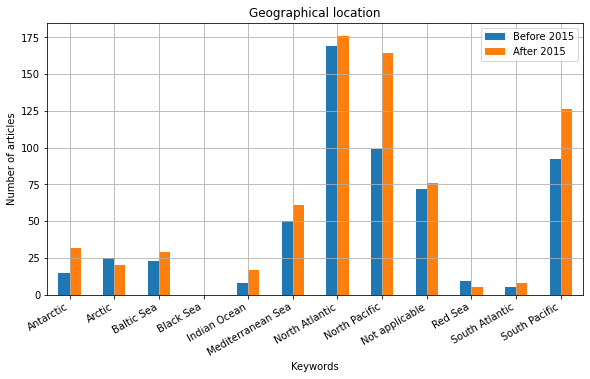

In [22]:
year = 2015

# All categories except
categories = df.columns
categories = categories.drop(['_id', 'citation_date', 'keyword', 'Targeted species'])

for category in ['Geographical location'] :
#for category in categories :

    dhisto = pd.DataFrame()
    
    listKeywords = dictCategory[category]

    for k in listKeywords:
        s_total = df[df[category].apply(lambda x: bool(set(x) & set([k])))]
        s_period1 = s_total[s_total['citation_date'].between('1950-01-01', str(year-1)+'-12-31')]
        s_period2 = s_total[s_total['citation_date'].between(str(year)+'-01-01', '2030-12-31')]
    
        dhisto = dhisto.append({ 'name': k, 
                             'Before ' + str(year): len(s_period1), 
                             'After ' + str(year):  len(s_period2) }, 
                           ignore_index=True)

    dhisto.set_index('name', inplace=True)

    p = dhisto.plot.bar(title=category, 
                xlabel="Keywords", ylabel="Number of articles",
                grid=True, figsize=[0.8*len(listKeywords) ,5], width=0.5)
    plt.xticks(rotation=30, horizontalalignment='right')
    plt.savefig(category.replace(' ', '_') + '_1.png', 
                facecolor="white", transparent=False, bbox_inches="tight")
    plt.show()
    

### Histogram with Total and Before

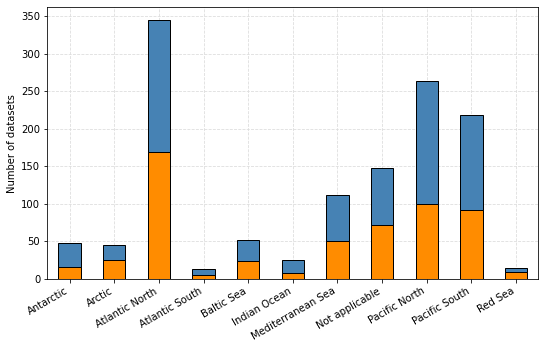

                   Before 2015  After 2015  Total
name                                             
Antarctic                 15.0        32.0   47.0
Arctic                    25.0        20.0   45.0
Atlantic North           169.0       176.0  345.0
Atlantic South             5.0         8.0   13.0
Baltic Sea                23.0        29.0   52.0
Indian Ocean               8.0        17.0   25.0
Mediterranean Sea         50.0        61.0  111.0
Not applicable            72.0        76.0  148.0
Pacific North             99.0       164.0  263.0
Pacific South             92.0       126.0  218.0
Red Sea                    9.0         5.0   14.0


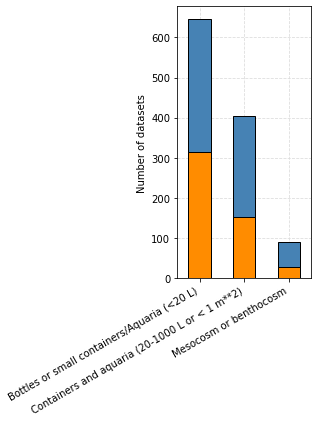

                                                Before 2015  After 2015  Total
name                                                                          
Bottles or small containers/Aquaria (<20 L)           314.0       331.0  645.0
Containers and aquaria (20-1000 L or < 1 m**2)        152.0       253.0  405.0
Mesocosm or benthocosm                                 29.0        61.0   90.0


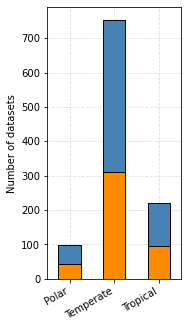

           Before 2015  After 2015  Total
name                                     
Polar             43.0        56.0   99.0
Temperate        312.0       441.0  753.0
Tropical          95.0       126.0  221.0


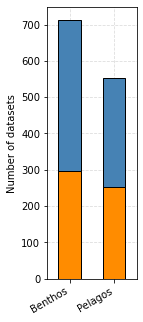

         Before 2015  After 2015  Total
name                                   
Benthos        298.0       415.0  713.0
Pelagos        252.0       302.0  554.0


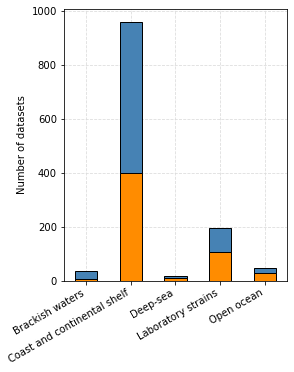

                             Before 2015  After 2015  Total
name                                                       
Brackish waters                      5.0        32.0   37.0
Coast and continental shelf        401.0       559.0  960.0
Deep-sea                            10.0         7.0   17.0
Laboratory strains                 106.0        91.0  197.0
Open ocean                          29.0        19.0   48.0


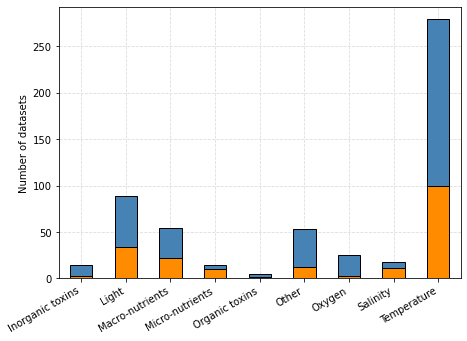

                  Before 2015  After 2015  Total
name                                            
Inorganic toxins          2.0        12.0   14.0
Light                    34.0        55.0   89.0
Macro-nutrients          22.0        32.0   54.0
Micro-nutrients          10.0         4.0   14.0
Organic toxins            1.0         4.0    5.0
Other                    12.0        41.0   53.0
Oxygen                    2.0        23.0   25.0
Salinity                 11.0         7.0   18.0
Temperature             100.0       179.0  279.0


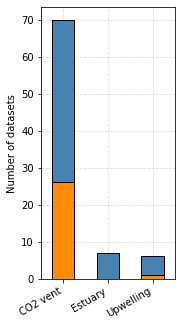

           Before 2015  After 2015  Total
name                                     
CO2 vent          26.0        44.0   70.0
Estuary            0.0         7.0    7.0
Upwelling          1.0         5.0    6.0


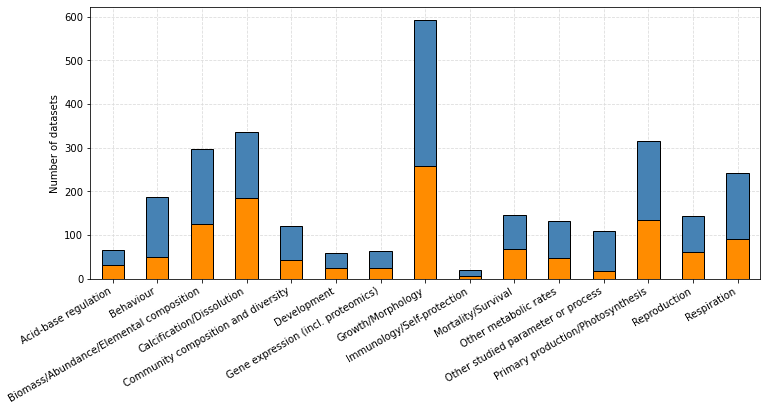

                                         Before 2015  After 2015  Total
name                                                                   
Acid-base regulation                            31.0        35.0   66.0
Behaviour                                       50.0       136.0  186.0
Biomass/Abundance/Elemental composition        126.0       171.0  297.0
Calcification/Dissolution                      184.0       151.0  335.0
Community composition and diversity             42.0        78.0  120.0
Development                                     25.0        33.0   58.0
Gene expression (incl. proteomics)              25.0        38.0   63.0
Growth/Morphology                              258.0       335.0  593.0
Immunology/Self-protection                       6.0        14.0   20.0
Mortality/Survival                              67.0        78.0  145.0
Other metabolic rates                           47.0        86.0  133.0
Other studied parameter or process              18.0        92.0

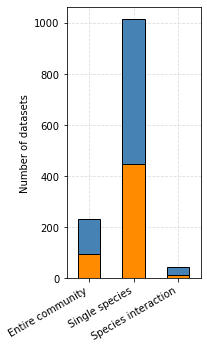

                     Before 2015  After 2015   Total
name                                                
Entire community            96.0       138.0   234.0
Single species             449.0       564.0  1013.0
Species interaction         12.0        32.0    44.0


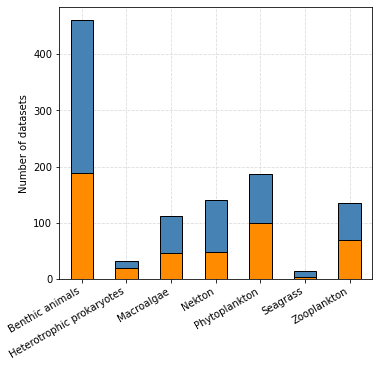

                           Before 2015  After 2015  Total
name                                                     
Benthic animals                  188.0       273.0  461.0
Heterotrophic prokaryotes         20.0        11.0   31.0
Macroalgae                        46.0        66.0  112.0
Nekton                            48.0        92.0  140.0
Phytoplankton                     99.0        87.0  186.0
Seagrass                           3.0        11.0   14.0
Zooplankton                       70.0        66.0  136.0


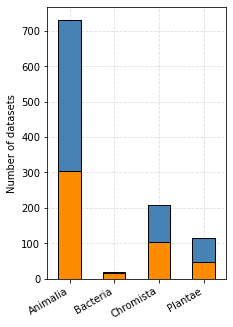

           Before 2015  After 2015  Total
name                                     
Animalia         304.0       427.0  731.0
Bacteria          15.0         4.0   19.0
Chromista        104.0       105.0  209.0
Plantae           46.0        68.0  114.0


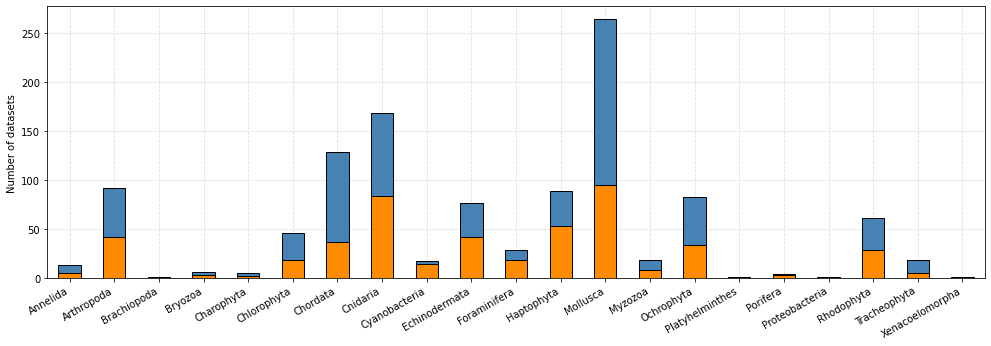

                 Before 2015  After 2015  Total
name                                           
Annelida                 5.0         8.0   13.0
Arthropoda              42.0        50.0   92.0
Brachiopoda              1.0         0.0    1.0
Bryozoa                  3.0         3.0    6.0
Charophyta               2.0         3.0    5.0
Chlorophyta             19.0        27.0   46.0
Chordata                37.0        92.0  129.0
Cnidaria                84.0        84.0  168.0
Cyanobacteria           14.0         3.0   17.0
Echinodermata           42.0        35.0   77.0
Foraminifera            19.0        10.0   29.0
Haptophyta              53.0        36.0   89.0
Mollusca                95.0       169.0  264.0
Myzozoa                  8.0        10.0   18.0
Ochrophyta              34.0        49.0   83.0
Platyhelminthes          0.0         1.0    1.0
Porifera                 3.0         1.0    4.0
Proteobacteria           0.0         1.0    1.0
Rhodophyta              29.0        32.0

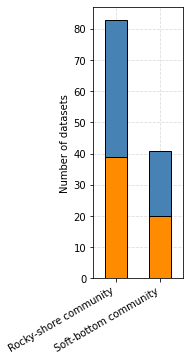

                       Before 2015  After 2015  Total
name                                                 
Rocky-shore community         39.0        44.0   83.0
Soft-bottom community         20.0        21.0   41.0


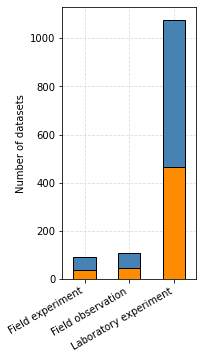

                       Before 2015  After 2015   Total
name                                                  
Field experiment              37.0        53.0    90.0
Field observation             47.0        61.0   108.0
Laboratory experiment        466.0       610.0  1076.0


In [25]:
year = 2015

# All categories except
categories = df.columns
categories = categories.drop(['_id', 'citation_date', 'keyword', 'Targeted species'])

for category in categories :
#or category in ['Geographical location'] :

    dhisto = pd.DataFrame()
    
    listKeywords = dictCategory[category]

    for k in listKeywords:
        s_total = df[df[category].apply(lambda x: bool(set(x) & set([k])))]
        s_period1 = s_total[s_total['citation_date'].between('1950-01-01', str(year-1)+'-12-31')]
        s_period2 = s_total[s_total['citation_date'].between(str(year)+'-01-01', '2030-12-31')]
    
        dhisto = dhisto.append({ 'name': k, 
                             'Before ' + str(year): len(s_period1), 
                             'After ' + str(year):  len(s_period2),
                             'Total':  len(s_total)}, 
                           ignore_index=True)

    dhisto.set_index('name', inplace=True)
    
    if category == 'Geographical location':
        dhisto.rename(index = {
                            'North Atlantic': 'Atlantic North',
                            'South Atlantic': 'Atlantic South',
                            'North Pacific': 'Pacific North',
                            'South Pacific': 'Pacific South',
                             }, inplace=True)
    dhisto.sort_index(inplace=True)
    
    dhistoFiltered = dhisto[dhisto['Total'] != 0]
    
    ax = dhistoFiltered.plot.bar(y=['Before ' + str(year), 'After ' + str(year)], 
                                 figsize=[0.8*len(dhistoFiltered),5], width=0.5, 
                                 color=["darkorange", "steelblue"],
                                 stacked=True, grid=True, zorder=3, 
                                 linestyle='-', edgecolor="black",
                                 xlabel="", ylabel="Number of datasets")
    ax.grid(zorder=0, color='gainsboro', linestyle='--')
    ax.get_legend().remove()
    plt.xticks(rotation=30, horizontalalignment='right')
    plt.savefig(category.replace(' ', '_') + '.png', 
                facecolor="white", transparent=False, bbox_inches="tight")
    plt.show()
    
    print(dhistoFiltered)